## Importting Libraries

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Prepare Data

In [17]:
FILE_NAME = 'heart.csv'
df = pd.read_csv(FILE_NAME)

### Understanding this data

In [18]:
# show (rows, columns)
df.shape

(303, 14)

In [19]:
# show first 5 rows
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# show attributes
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [23]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# check null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
# check for duplicates
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Step 2: Distinguish Attributes

In [89]:
categorical_columns = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_col = ['output']

## Step 3: Univariate Analysis

### Ouput Analysis

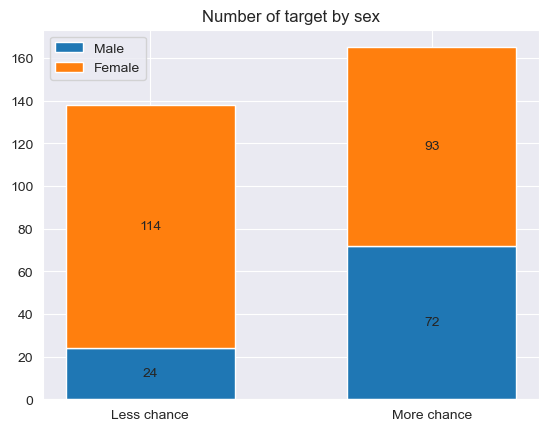

In [84]:
species = ('Less chance', 'More chance')
male_cols = df[df['sex'] == 0]
female_cols = df[df['sex'] == 1]
sex_counts = {
    'Male': [male_cols[male_cols['output'] == 0]['sex'].count(), male_cols[male_cols['output'] == 1]['sex'].count()],
    'Female': [female_cols[female_cols['output'] == 0]['sex'].count(), female_cols[female_cols['output'] == 1]['sex'].count()]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, 0.6, label=sex, bottom=bottom)
    bottom += sex_count
    
    ax.bar_label(p, label_type='center')
    
ax.set_title('Number of target by sex')
ax.legend()

plt.show()

### Qualitative Analysis

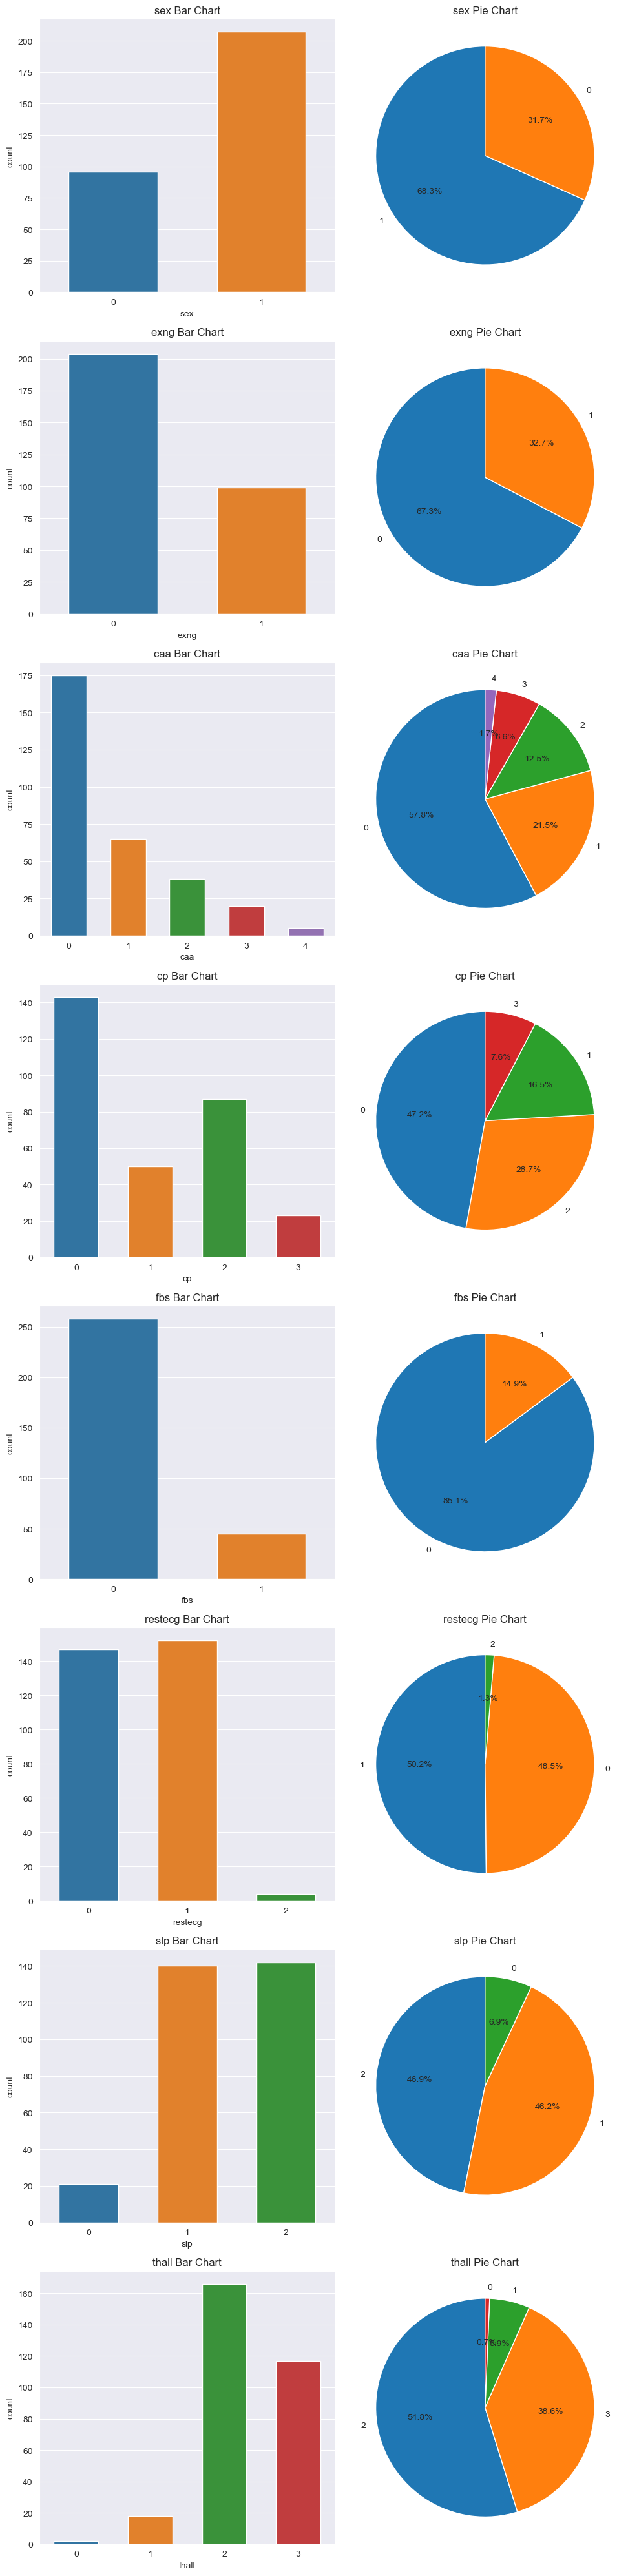

In [106]:
num_rows = len(categorical_columns)

fig, axis = plt.subplots(num_rows, 2, figsize=(10, 40))

axis = axis.flatten()

for i, feature in enumerate(categorical_columns):
    # Bar Chart
    sns.countplot(x = feature, width = 0.6, data = df, ax = axis[2 * i])
    axis[2 * i].set_title(f'{feature} Bar Chart')
    axis[2 * i].set_xlabel(feature)
    axis[2 * i].set_ylabel('count')
    
    # Pie Chart
    df[feature].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, ax = axis[2 * i + 1])
    axis[2 * i + 1].set_title(f'{feature} Pie Chart')
    axis[2 * i + 1].set_ylabel('')

plt.tight_layout()
plt.show()

### Quantitative Analysis

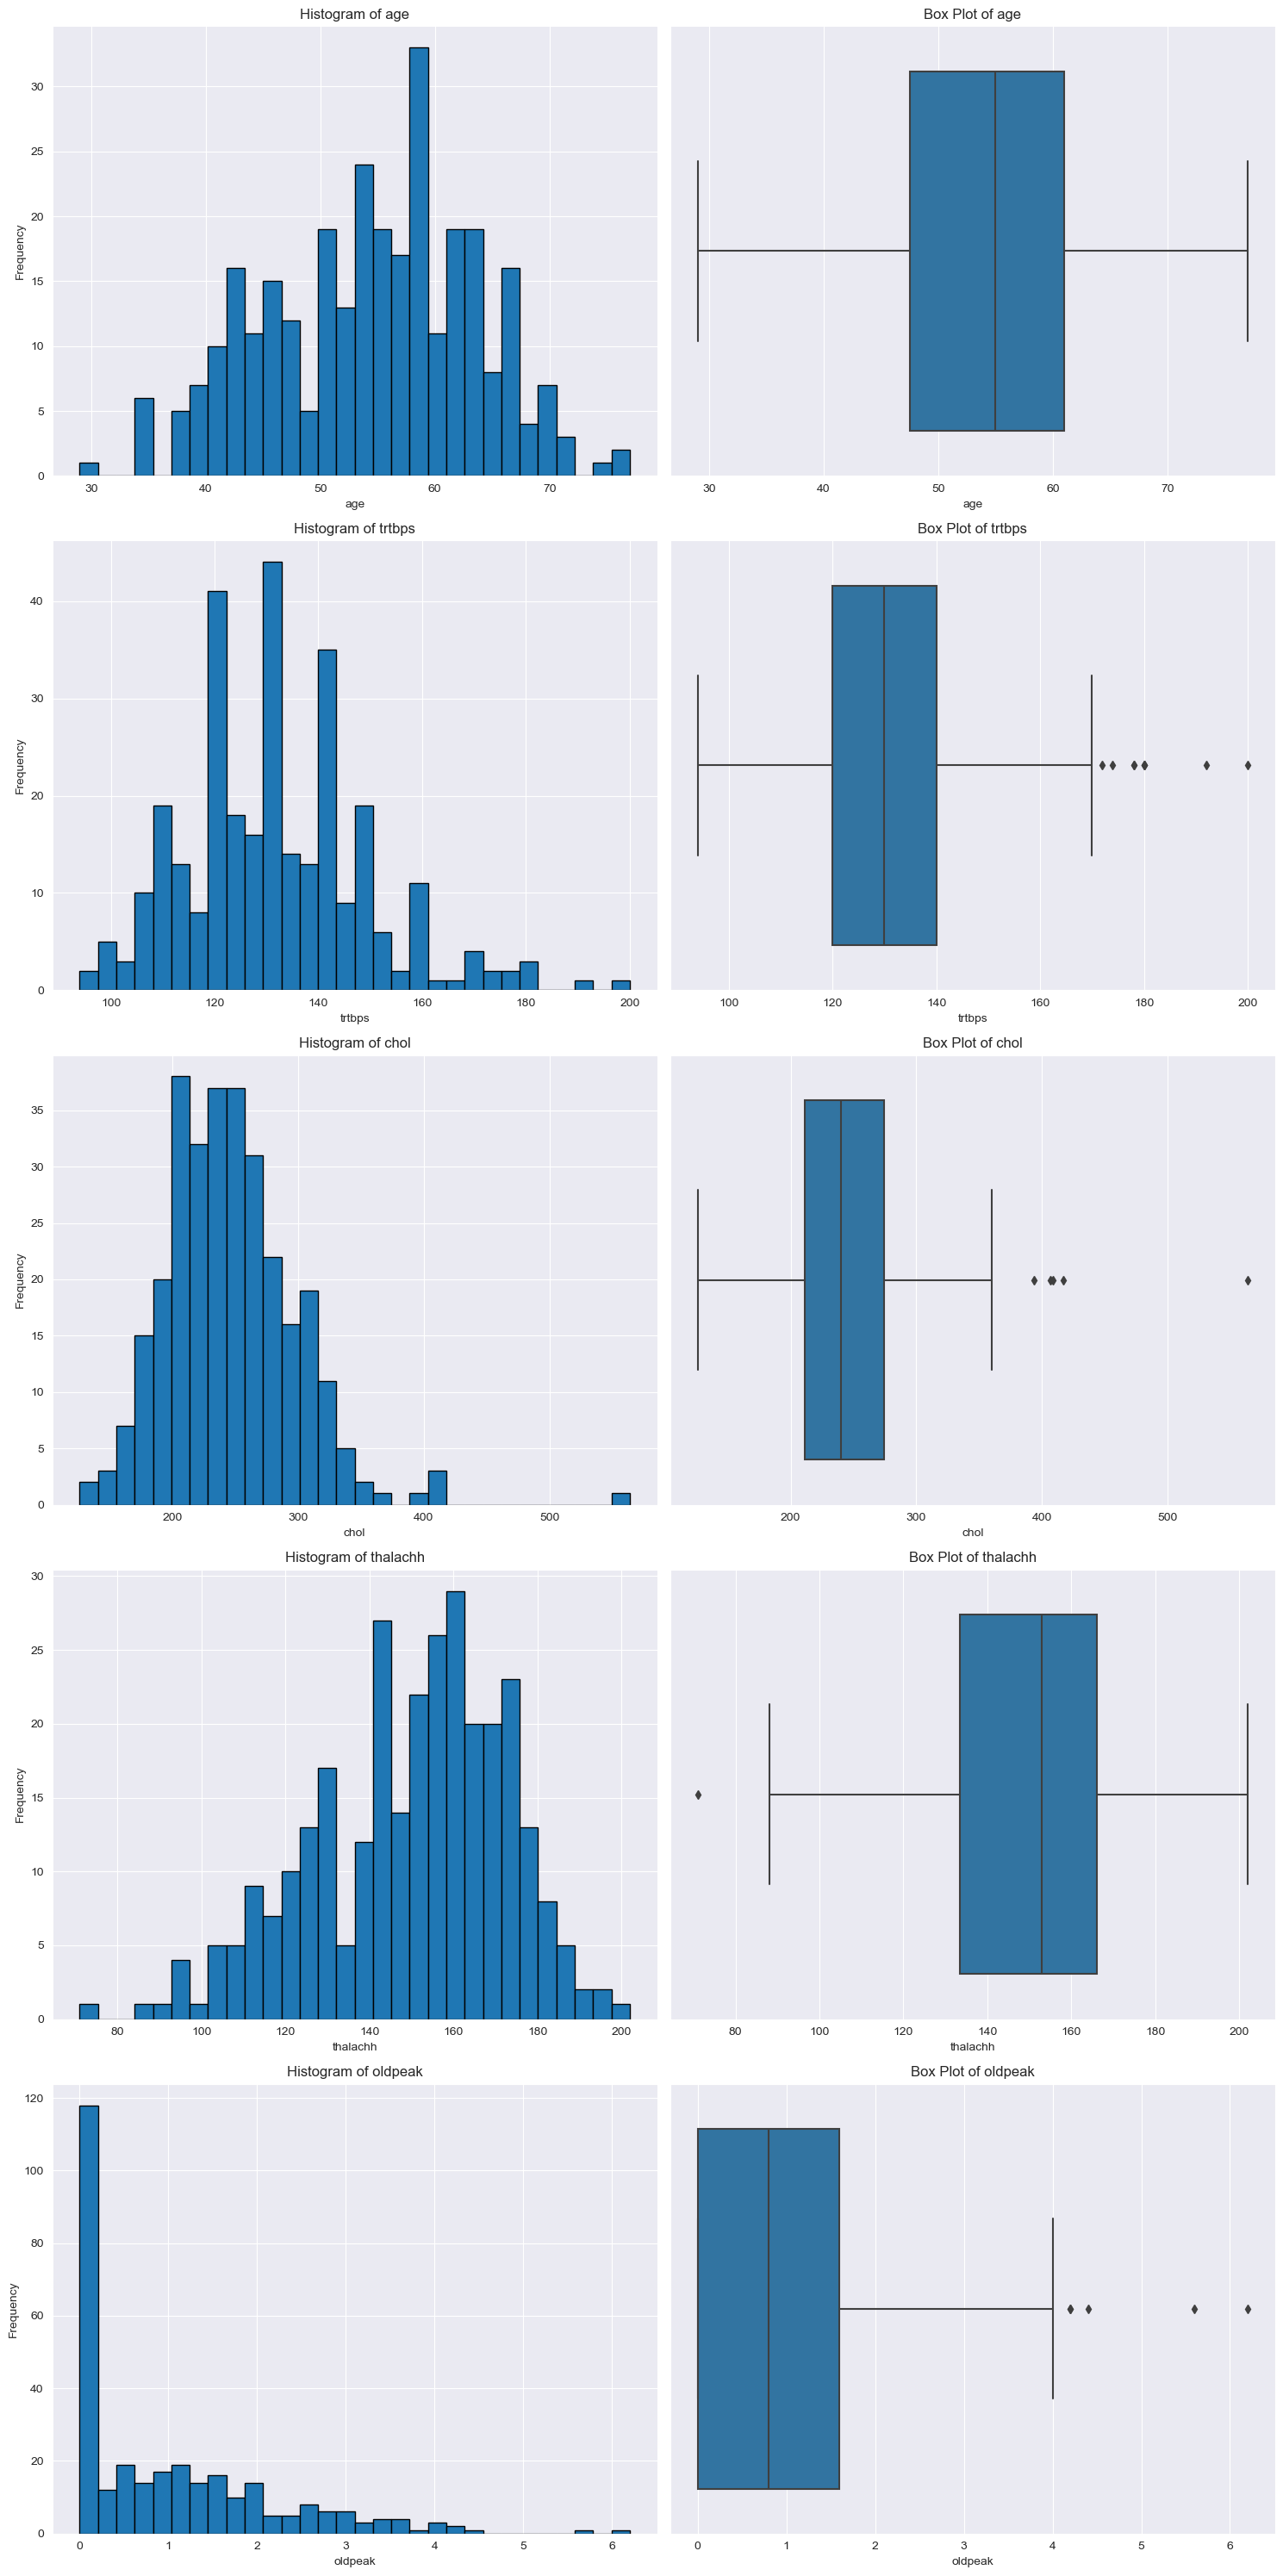

In [110]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 30))

for i, feature in enumerate(numerical_columns):
    # Histogram
    df[feature].hist(bins=30, edgecolor='k', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()


## Step 4: Bivariate Analysis

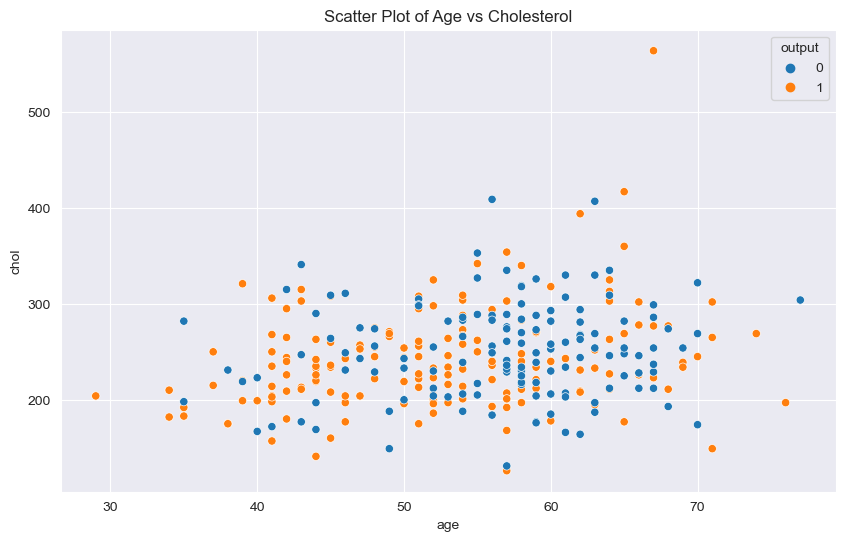

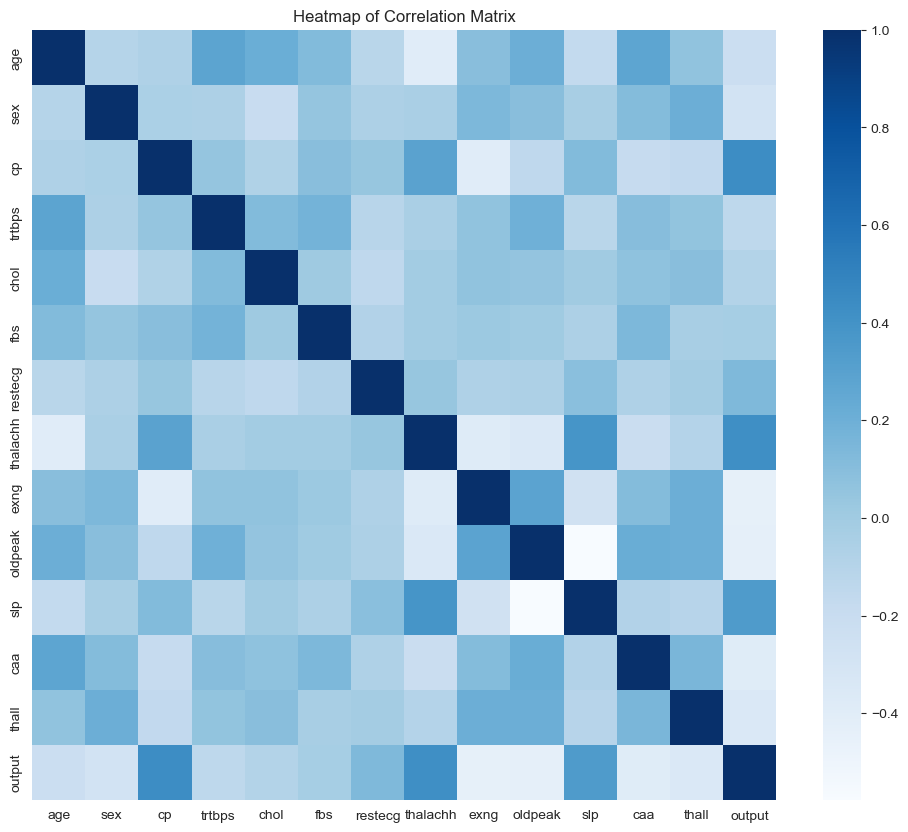

In [116]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Scatter Plot of Age vs Cholesterol')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Heatmap of Correlation Matrix')
plt.show()